# Failure Analysis in Power Transformers

A transformer can fail for a variety of reasons, but the most common causes include lightning strikes, overloading, wear and corrosion, power surges, and moisture. Regardless of the cause, the result can be remarkable. Transformers contain mineral oil keeping the transformer cool. When it becomes overcharged, the wiring can create heat and a spark. This massive overpressure may eventually cause the transformer to rupture with a loud boom, flash, and possibly a fireball that can create a large plume of smoke that can be seen from a long distance.

Reference : https://www.kaggle.com/shashwatwork/failure-analysis-in-power-transformers-dataset

![w1.jpg](https://www.fundacionendesa.org/content/enel-foundes/es/megamenu/recursos/archive/2019/08/corrientes-alternas-con-un-transformador-electrico/_jcr_content/carousel/items/image.img.jpg/1565253677300.jpg)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split

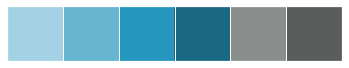

In [95]:
#PALETTE COLOR
bll ='#a2d2e3'
bl = '#66b5d1'
b = '#2596be'
bd ='#196985'
gl = '#8a8e8c'
gd = '#595e5c'
colors = [bll,bl,b,bd,gl,gd]
sns.palplot(colors)

In [3]:
#url = 'https://raw.githubusercontent.com/Cristina-MG/Failure-Analysis-in-Power-Transformers-/main/Health%20index1.csv'
url = 'Health index1.csv'

In [217]:
df = pd.read_csv('Health index1.csv')

In [218]:
df.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

* No hay missings

## TARGET

In [220]:
y =df['Life expectation']

In [221]:
y.unique()

array([19. ,  6. ,  6.9,  6.1, 17.5,  7.4, 20.3,  6.5,  6.6, 15.2, 29.1,
       29.8, 16.4, 29.9, 30. , 30.2, 30.3, 17.3, 17.4, 17.6, 17.7, 17.9,
       17.8, 31.1, 31.3,  7.8, 18.8, 32. , 32.1, 19.1,  6.2, 42.5, 50.7,
       19.8, 19.7, 33.9, 50.8, 51. , 33.4, 33.6, 40.8, 32.4,  6.7])

In [222]:
from scipy.stats import norm

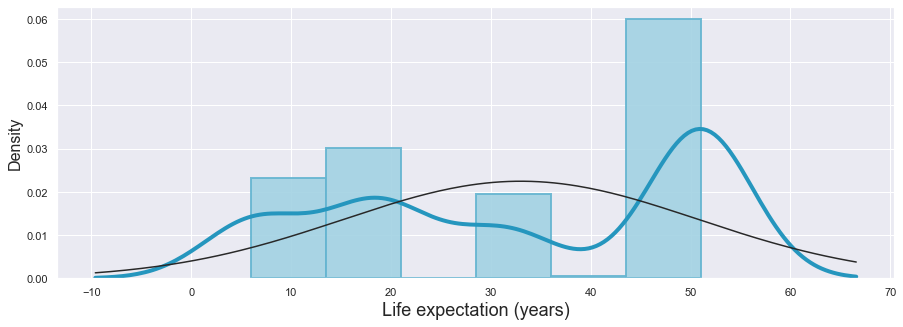

In [223]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(y,
             fit=norm,
             hist_kws={
                 'color': colors[0],
                 'edgecolor': colors[1],
                 'linewidth': 2,
                 'linestyle': '-',
                 'alpha': 0.9
             },
             kde_kws={
                 'color': colors[2],
                 'linewidth': 4,
                 'linestyle': '-',
                 'alpha': 0.9
             });
plt.xlabel('Life expectation (years)', fontsize=18)
plt.ylabel('Density', fontsize=16);

* No sigue una distribució normal
* Asimétrico

### RELATIONSHIP WITH VARIABLES


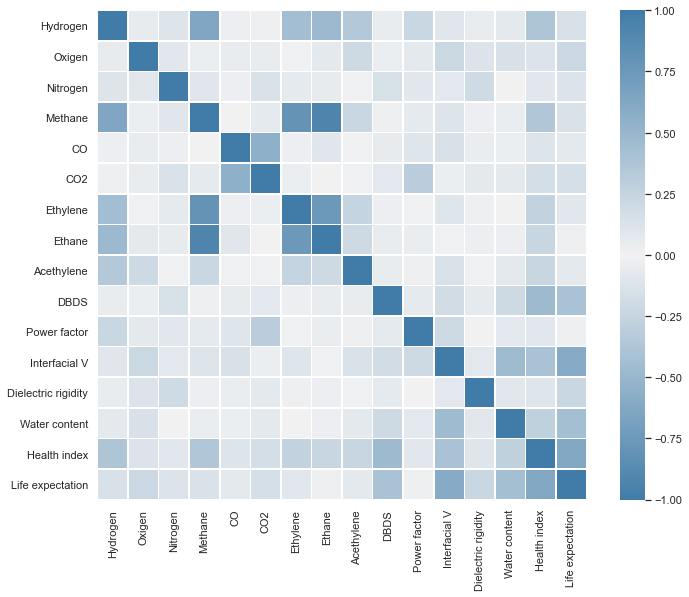

In [224]:
color_palette = sns.diverging_palette(600, 600, as_cmap = True)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1,vmin =-1, square=True, cmap = color_palette, linewidth=.5);

Estas variables tienen relación entre ellas:

   * Methane | Ethylene | Ethane
    
   * Hydrogen | Methane

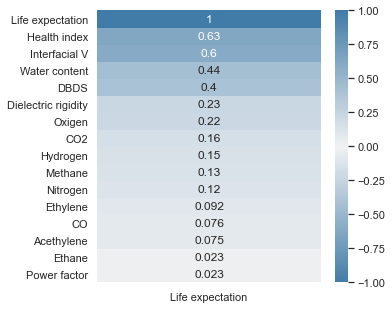

In [225]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(abs(df.corr()[['Life expectation']]).sort_values('Life expectation'),
 vmax=1, vmin=-1, cmap=color_palette, annot=True, ax=ax);
ax.invert_yaxis()

Las variables que estan más relacionadas con el target de forma lineal son:
* Health index
* Interfacial V
* Water content
* DBDS
* Dielectric rigidity
* Oxigen
* CO2
* Hydrogen
* Methane
* Nitrogen
* Ethylene

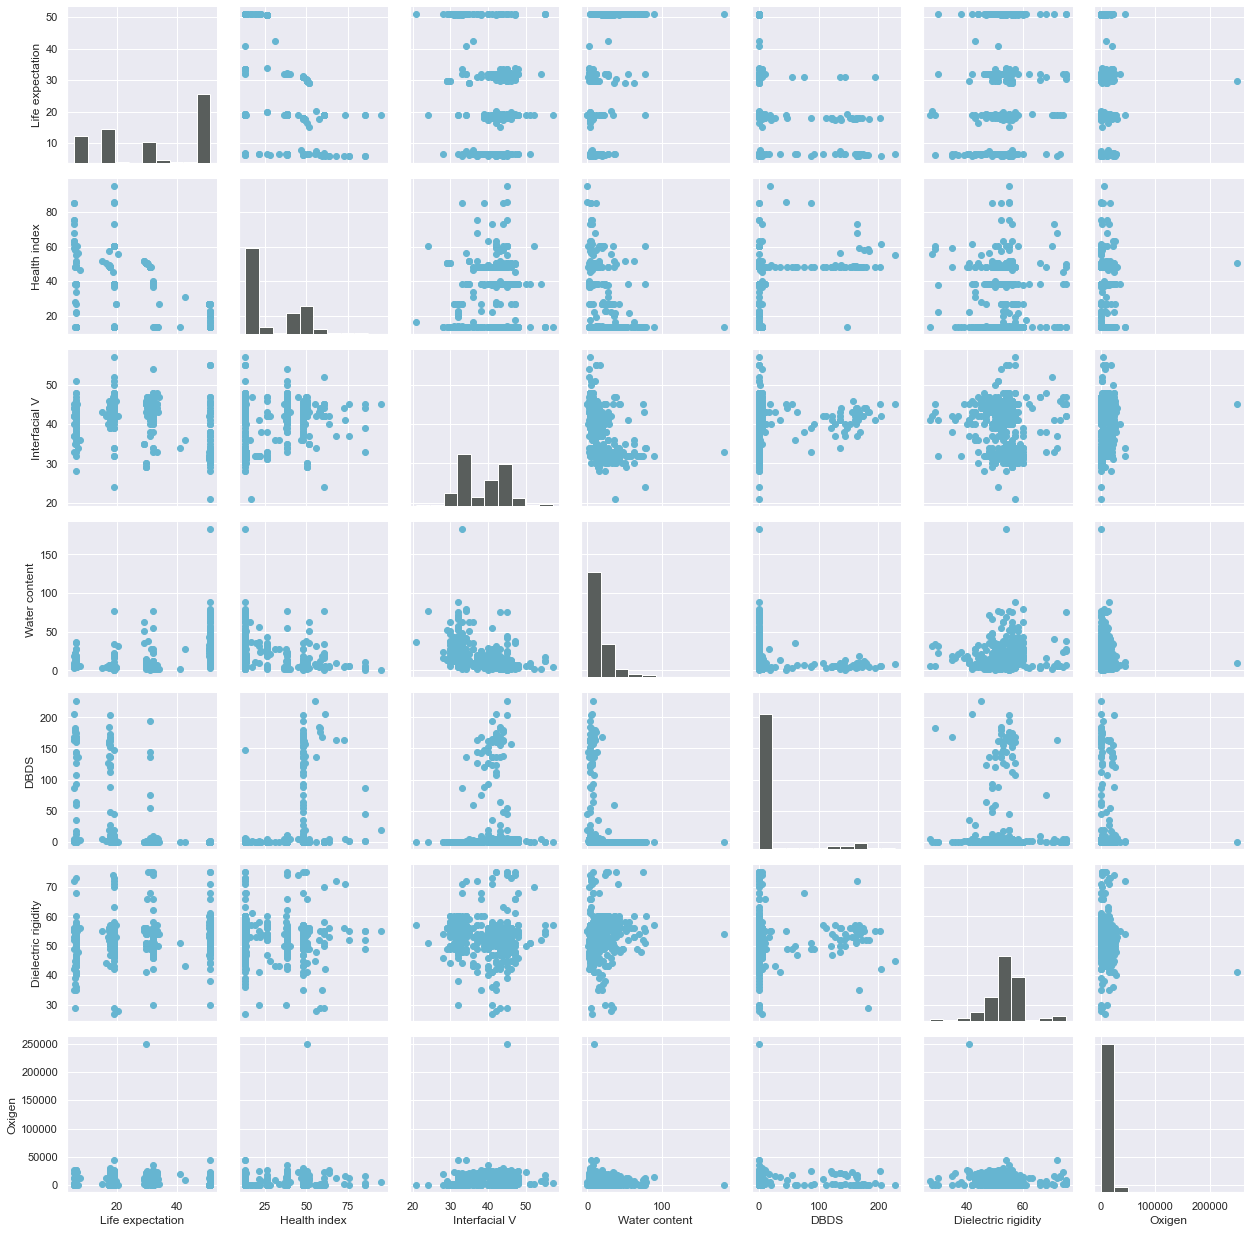

In [226]:
#scatterplot
def my_scatter(x,y, **kwargs):
    kwargs['color'] = colors[1]
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = gd
    plt.hist(x, **kwargs)


sns.set()
cols = ['Life expectation', 
        'Health index', 
        'Interfacial V', 
        'Water content', 
        'DBDS', 
        'Dielectric rigidity', 
        'Oxigen'
       ]
g = sns.PairGrid(df[cols], size = 2.5)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)
plt.show();

## FEATURES

In [227]:
x = df.drop('Life expectation', axis=1)

In [228]:
features = list(x.columns)

In [229]:
x.head(5)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2


* Todas las features son numéricas, no hay ninguna que sea categórica.
* No hay missings.

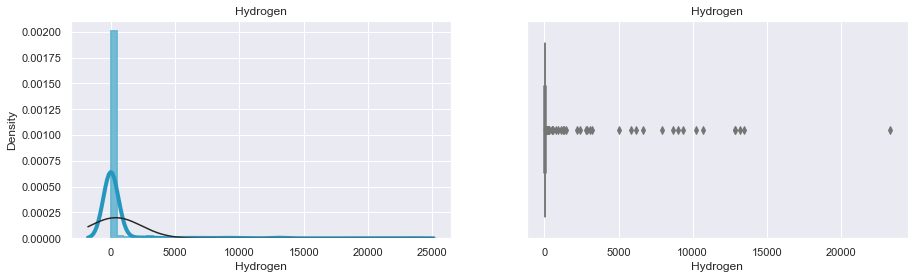

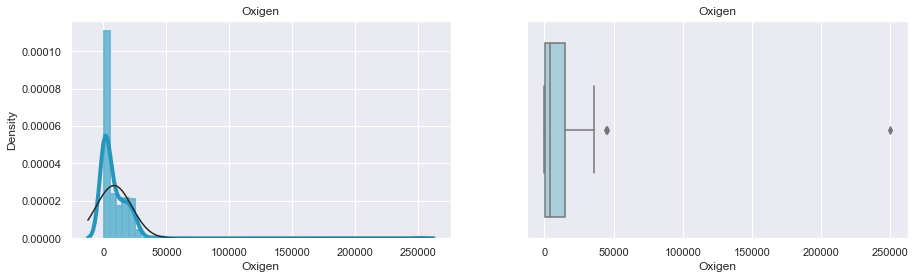

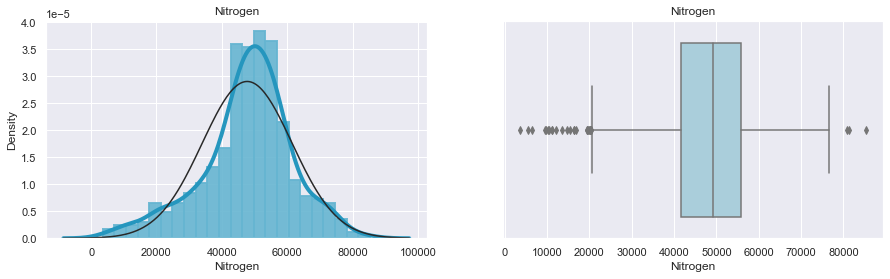

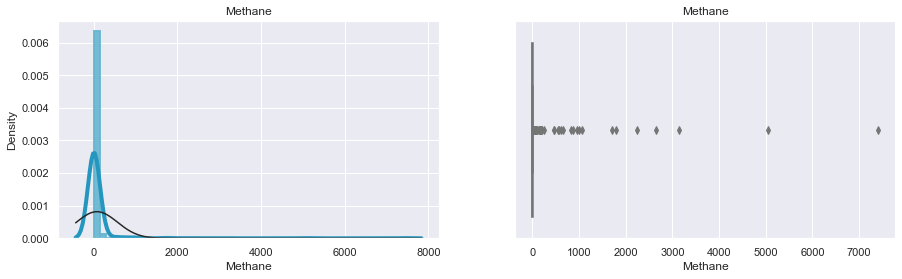

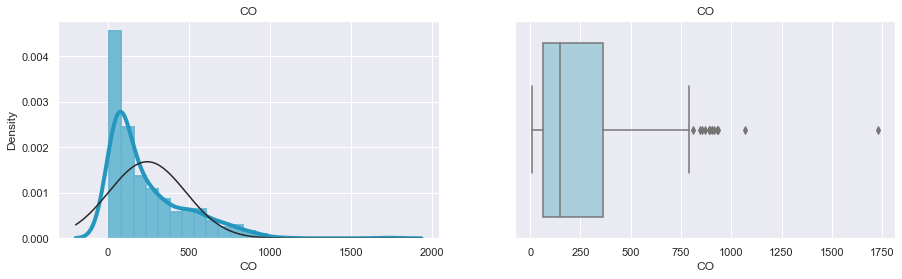

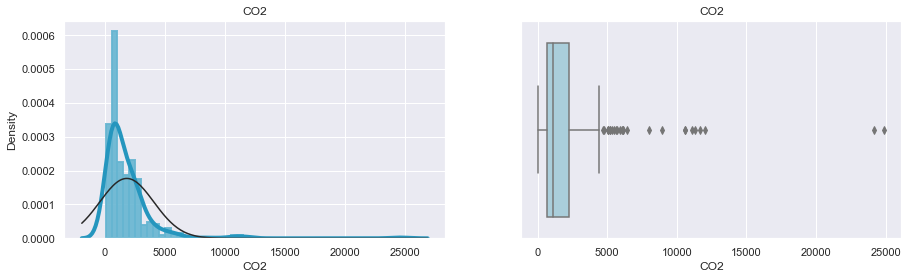

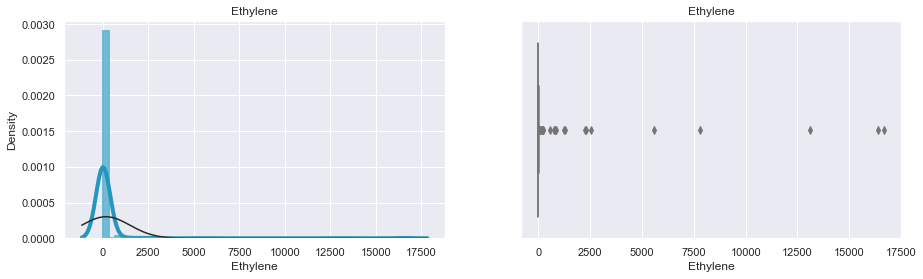

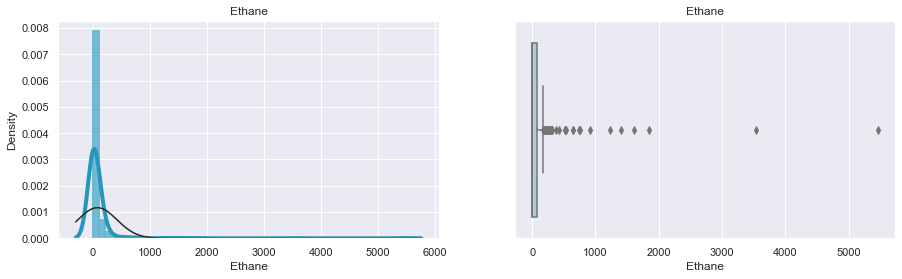

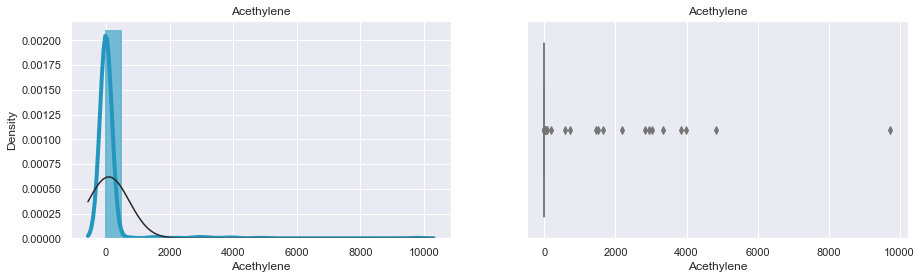

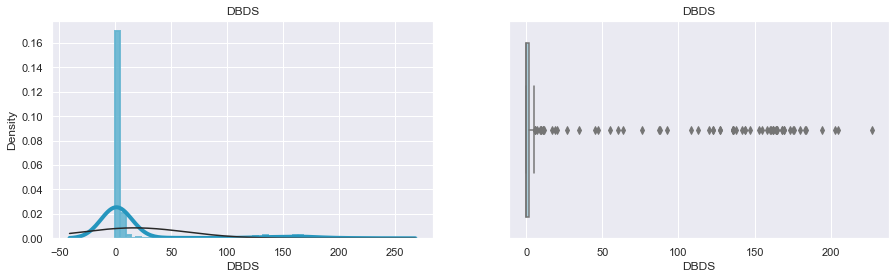

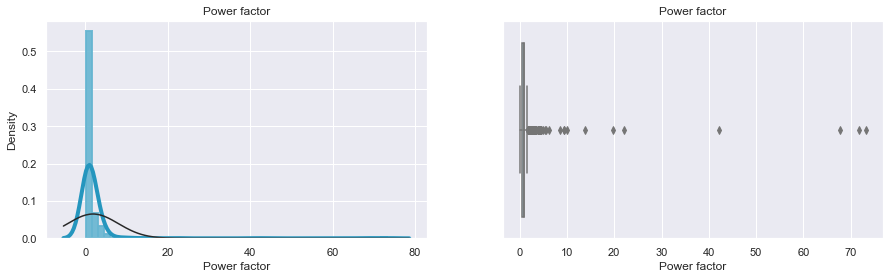

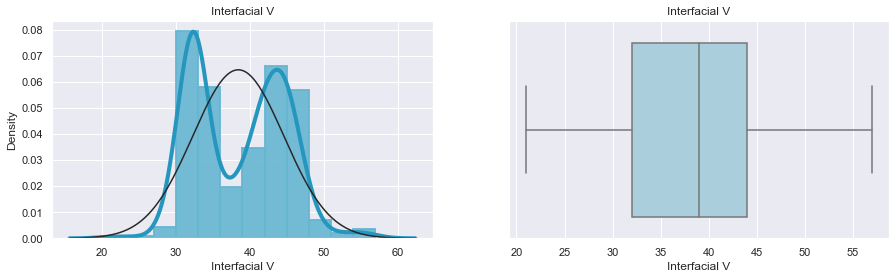

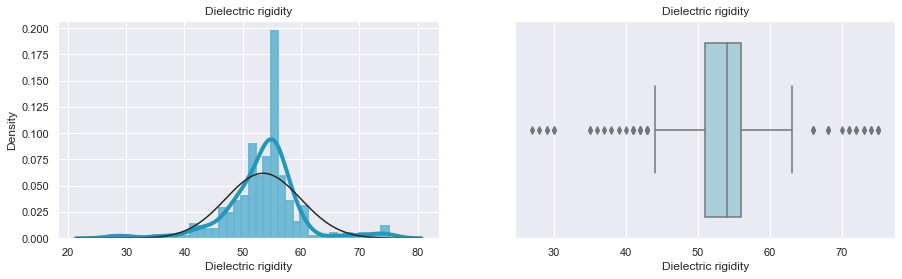

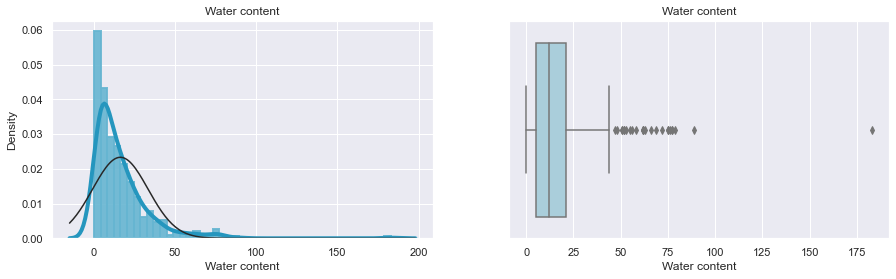

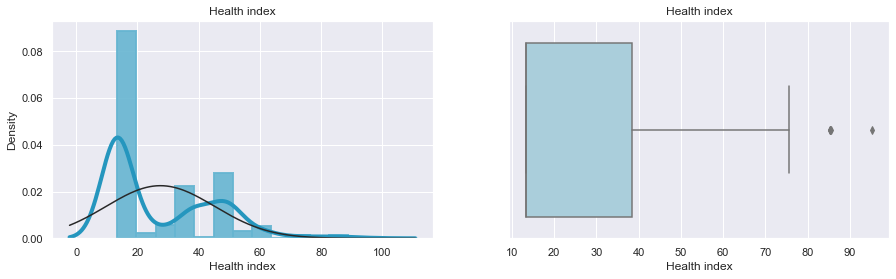

In [230]:
for i in x.columns:

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    
    sns.distplot(
        x[i],
        ax=ax[0],
        fit = norm,
        
        hist_kws={
                 'color': colors[1],
                 'edgecolor': colors[1],
                 'linewidth': 2,
                 'linestyle': '-',
                 'alpha': 0.9
             },
        kde_kws={
                 'color': colors[2],
                 'linewidth': 4,
                 'linestyle': '-',
                 'alpha': 0.9
             })
    
    ax[0].set_title(i)
    sns.boxplot(x[i],ax=ax[1], color=colors[0])
    ax[1].set_title(i)

## TRAIN & TEST

In [328]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Life expectation', axis= 1),
                                                    df['Life expectation'],
                                                    test_size=0.30,
                                                    random_state=42)

In [329]:
df_train = pd.concat([X_train, y_train], axis =1)

## FEATURE ENGINEER

### REMOVE FEATURES 

* Remove Ethylene and Ethane, porque tiene colinealidad con Methane

In [330]:
X_train = X_train.drop(['Ethylene','Ethane'], axis =1)

In [331]:
df_train = pd.concat([X_train, y_train], axis =1)

### BOX-COX

In [332]:
from scipy.stats import shapiro
from scipy.stats import skew


In [333]:
from scipy.special import boxcox1p

In [334]:
df_train_cb = pd.DataFrame()
for i in df_train.columns:
    df_train_cb[i] = boxcox1p(df_train[i],0.25)

In [335]:
list_not_bc = list()
for i in df_train.columns:
    var = df_train[i]
    varo = df_train_cb[i]
    print("Saphiro ",i,' :', stats.shapiro(var).pvalue)
    print("Saphiro ",i,' :', stats.shapiro(varo).pvalue)
    print("Asimetria ",i,' :', stats.skew(var))
    print("Asimetria ",i,' :', stats.skew(varo))
    print('--------------------------------------')
    
    if (stats.shapiro(varo).pvalue < stats.shapiro(var).pvalue) and (abs(stats.skew(var))<abs(stats.skew(varo))):
        list_not_bc.append(i)
print(list_not_bc)

Saphiro  Hydrogen  : 1.8535943096073592e-35
Saphiro  Hydrogen  : 3.9498311746734726e-27
Asimetria  Hydrogen  : 7.4991311240231875
Asimetria  Hydrogen  : 3.5561138324788577
--------------------------------------
Saphiro  Oxigen  : 1.6199407922516519e-18
Saphiro  Oxigen  : 5.844881870165075e-12
Asimetria  Oxigen  : 1.1383460967959362
Asimetria  Oxigen  : 0.09069628959302091
--------------------------------------
Saphiro  Nitrogen  : 1.6076500060080434e-06
Saphiro  Nitrogen  : 8.55404147402235e-17
Asimetria  Nitrogen  : -0.5576492366752637
Asimetria  Nitrogen  : -1.8482817413227213
--------------------------------------
Saphiro  Methane  : 4.537856609682614e-36
Saphiro  Methane  : 7.520803425522799e-27
Asimetria  Methane  : 12.461703030728847
Asimetria  Methane  : 3.5285306286672564
--------------------------------------
Saphiro  CO  : 1.7934640528160352e-17
Saphiro  CO  : 1.8742187801734644e-09
Asimetria  CO  : 1.0593672172134652
Asimetria  CO  : 0.2681101605354346
----------------------

In [336]:
for i in df_train.columns:
    if not i in list_not_bc:
        df_train_cb[i] = boxcox1p(df_train[i],0.25)
    else: 
        df_train_cb[i]= df_train[i]

In [337]:
df_train_cb.columns

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Acethylene',
       'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity',
       'Water content', 'Health index', 'Life expectation'],
      dtype='object')

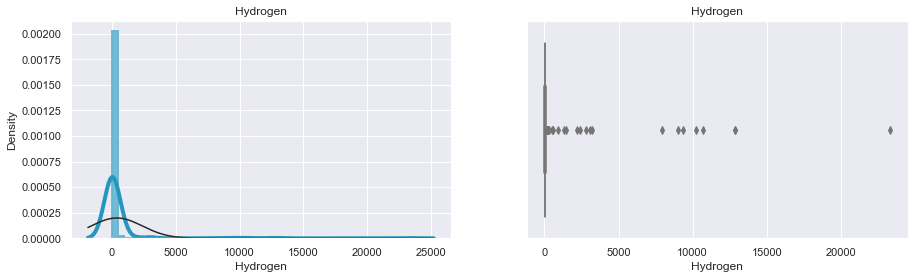

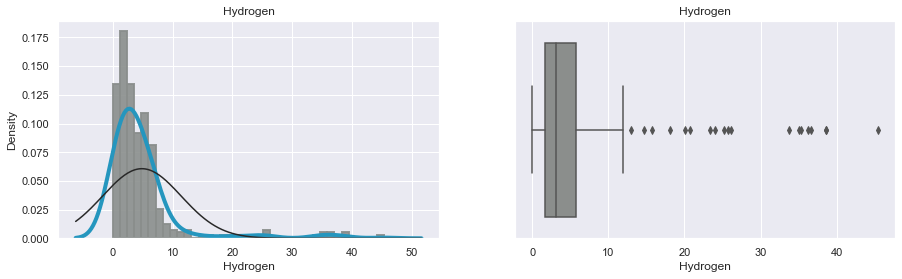

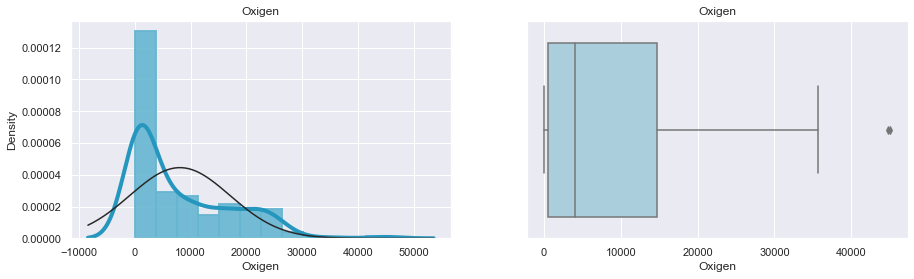

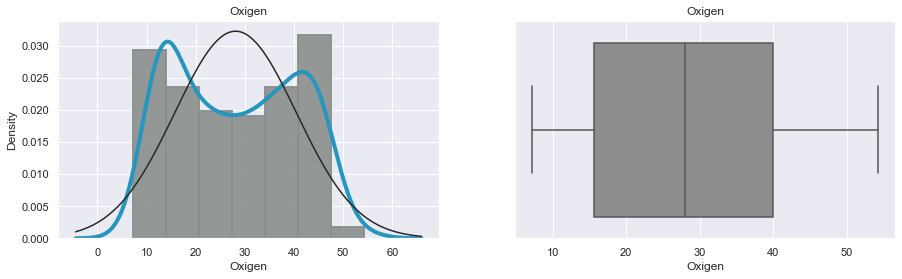

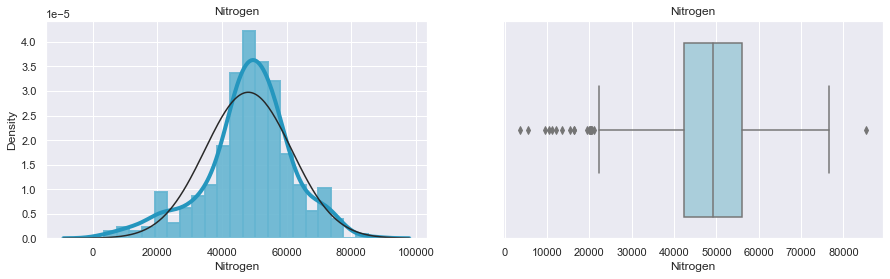

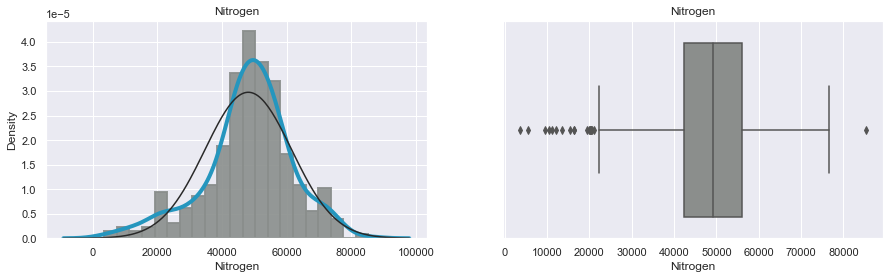

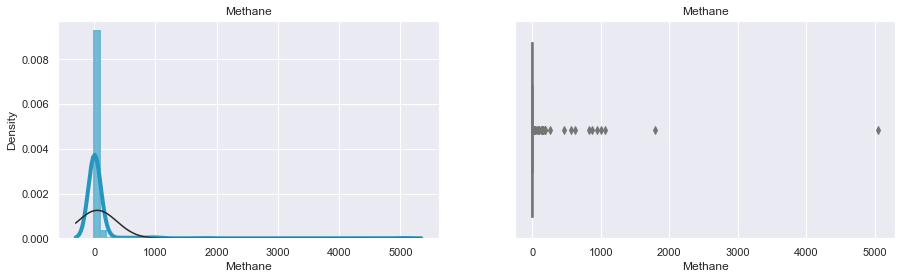

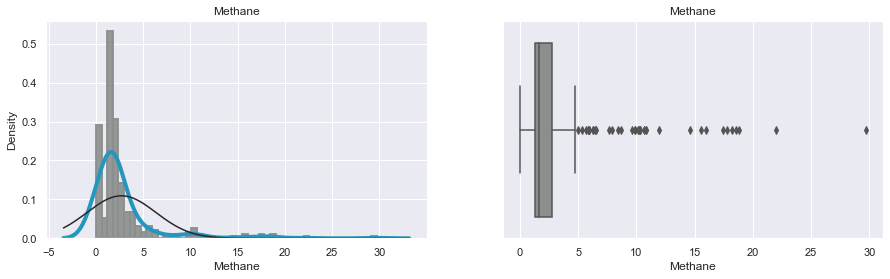

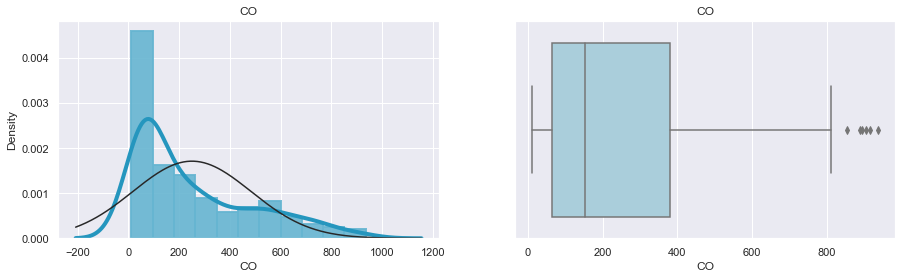

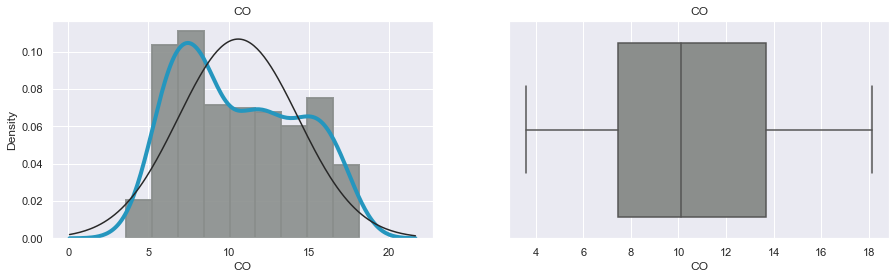

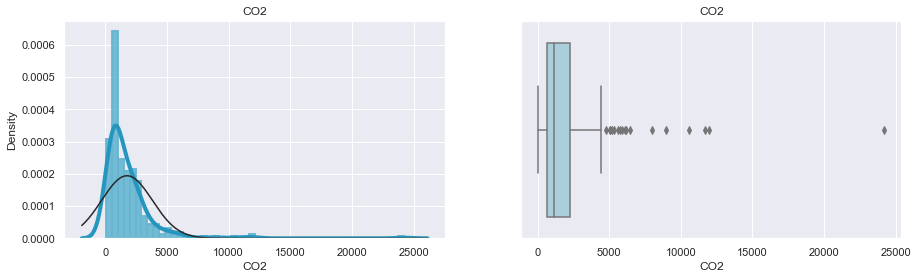

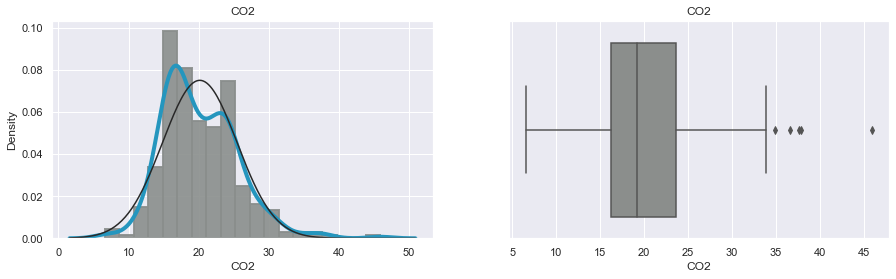

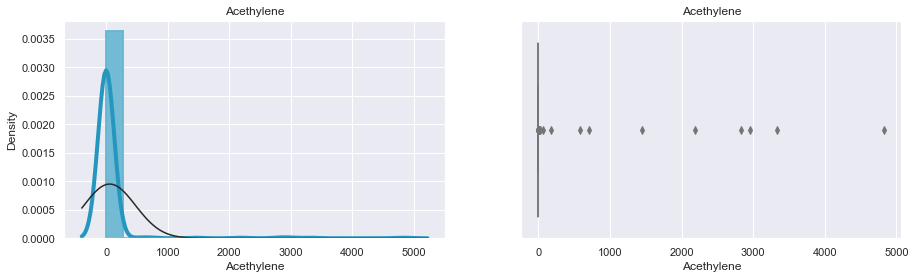

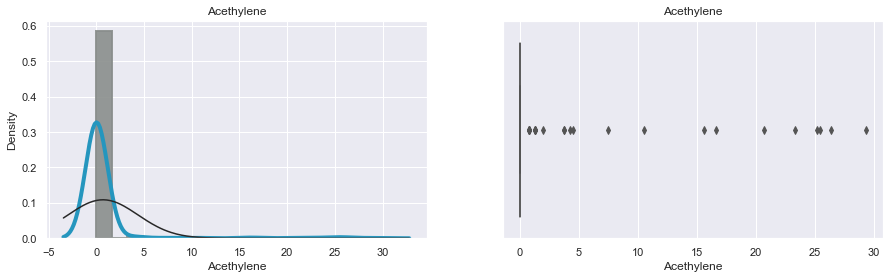

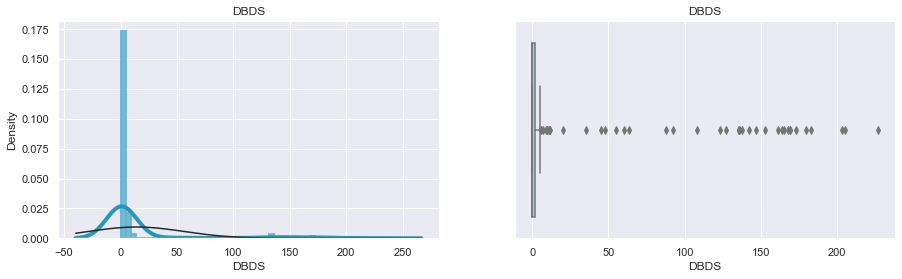

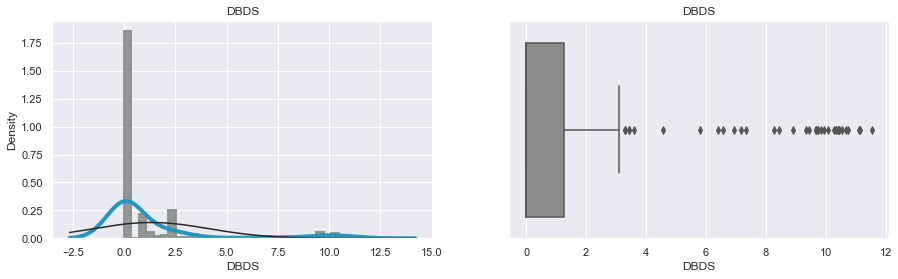

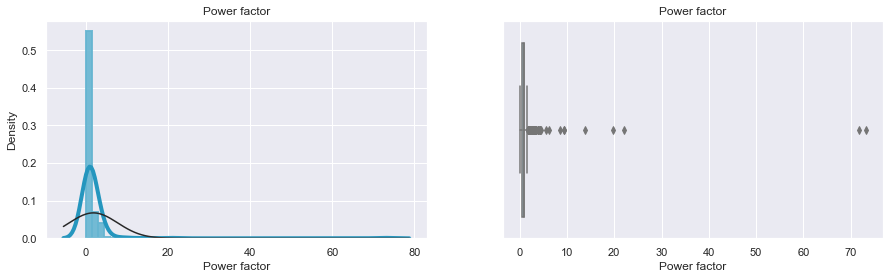

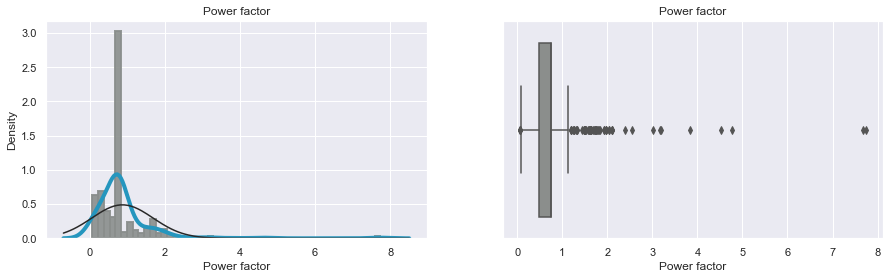

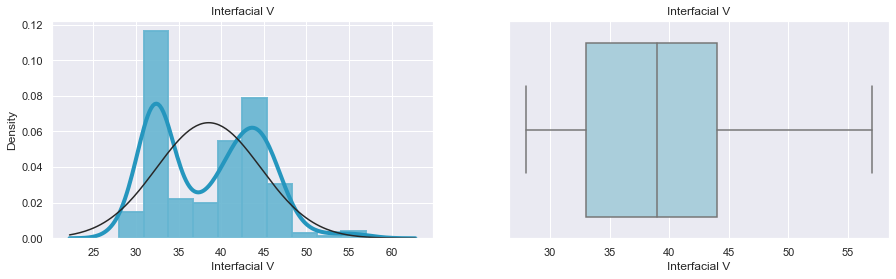

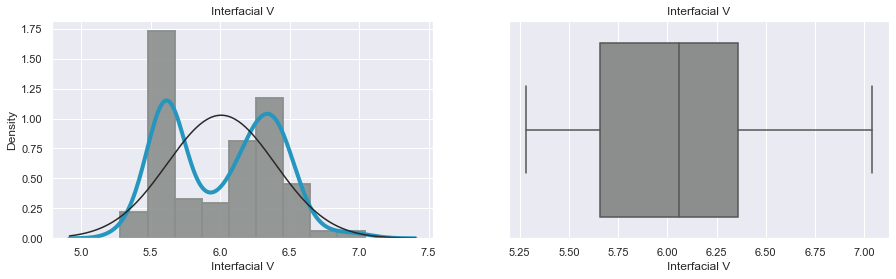

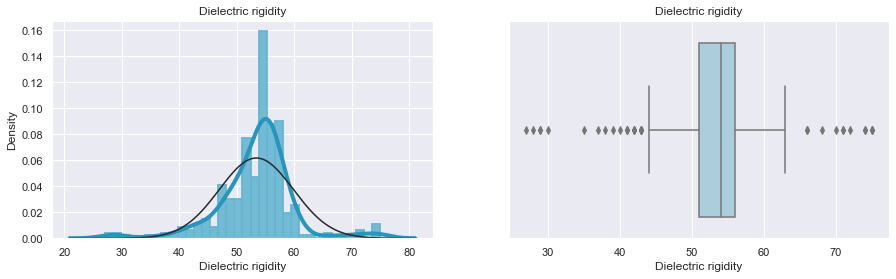

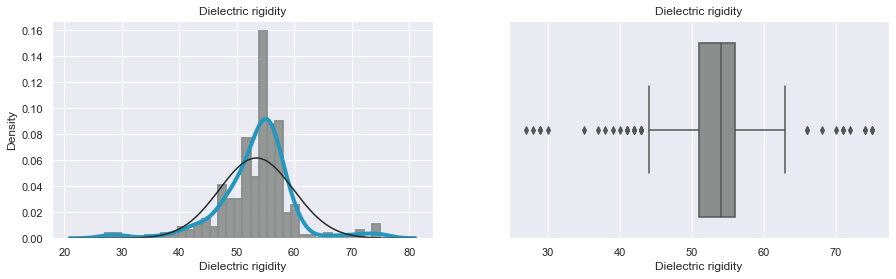

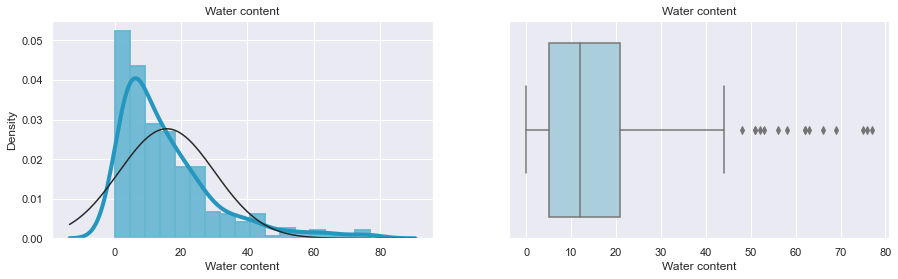

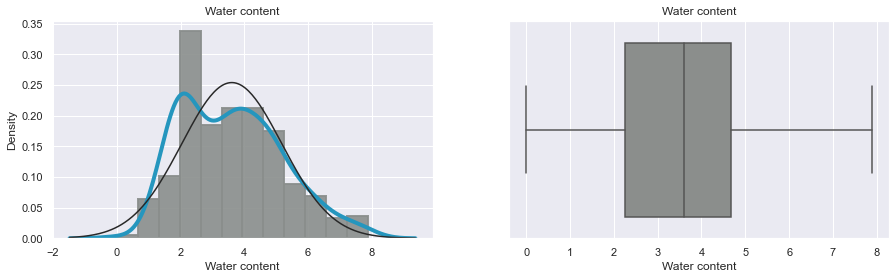

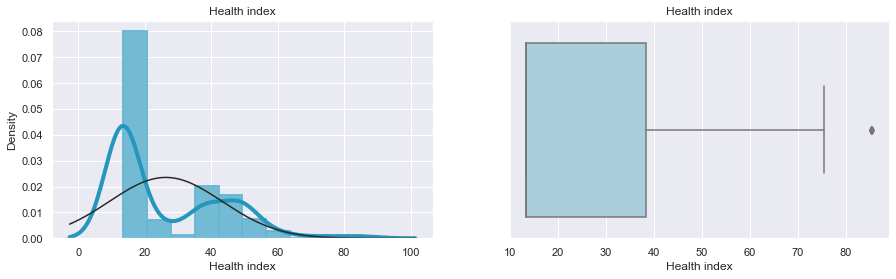

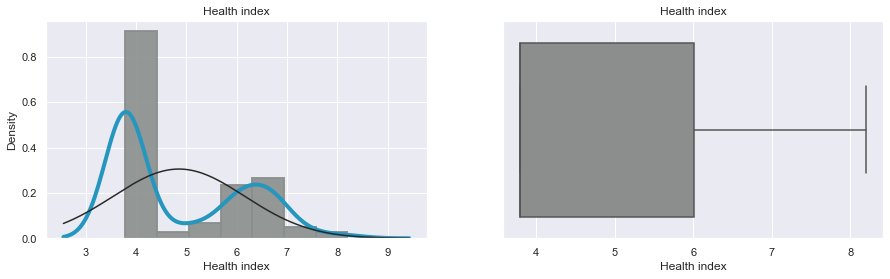

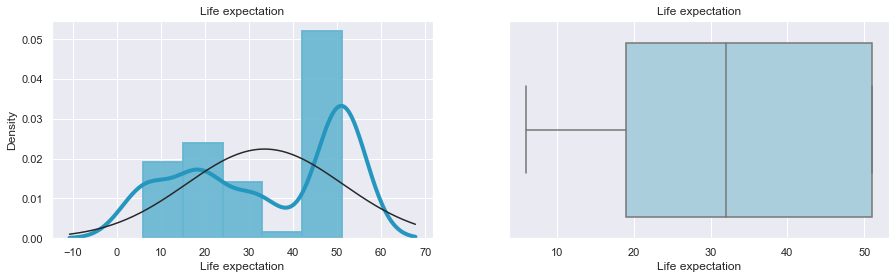

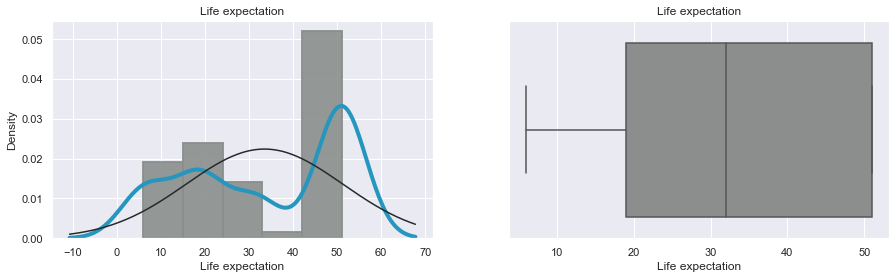

In [338]:
for i in df_train_cb.columns:

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    
    sns.distplot(
        df_train[i],
        ax=ax[0],
        fit = norm,
        
        hist_kws={
                 'color': colors[1],
                 'edgecolor': colors[1],
                 'linewidth': 2,
                 'linestyle': '-',
                 'alpha': 0.9
             },
        kde_kws={
                 'color': colors[2],
                 'linewidth': 4,
                 'linestyle': '-',
                 'alpha': 0.9
             })
    
    ax[0].set_title(i)
    sns.boxplot(df_train[i],ax=ax[1], color=colors[0])
    ax[1].set_title(i)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    
    sns.distplot(
        df_train_cb[i],
        ax=ax[0],
        fit = norm,
        
        hist_kws={
                 'color': gl,
                 'edgecolor': gl,
                 'linewidth': 2,
                 'linestyle': '-',
                 'alpha': 0.9
             },
        kde_kws={
                 'color': colors[2],
                 'linewidth': 4,
                 'linestyle': '-',
                 'alpha': 0.9
             })
    
    ax[0].set_title(i)
    sns.boxplot(df_train_cb[i],ax=ax[1], color=gl)
    ax[1].set_title(i)

### OUTLIERS

In [340]:
z = np.abs(stats.zscore(df_train_cb))
df_train_cb_outliers = df_train_cb[(z < 3).all(axis=1)]
df_train_cb_outliers.shape

(280, 14)

In [341]:
df_train_cb.shape

(329, 14)

### NEW FEATURES

* Health index
* Interfacial V
* Oxigen

#### Health index & Interfacial V & Oxigen

In [348]:
mean_HI = df_train_cb_outliers['Health index'].mean()
mean_IV = df_train_cb_outliers['Interfacial V'].mean()
mean_O = df_train_cb_outliers['Oxigen'].mean()

In [349]:
def new_feature(x,value):
    if x <= value:
        x = 0
    else:
        x=1
    return x

df_train_cb_outliers['HI'] = df_train_cb_outliers['Health index']
df_train_cb_outliers['HI'] = df_train_cb_outliers['HI'].apply(new_feature, value =(mean_HI ))

df_train_cb_outliers['IV'] = df_train_cb_outliers['Interfacial V']
df_train_cb_outliers['IV'] = df_train_cb_outliers['IV'].apply(new_feature, value =(mean_IV) )

df_train_cb_outliers['O'] = df_train_cb_outliers['Oxigen']
df_train_cb_outliers['O'] = df_train_cb_outliers['O'].apply(new_feature, value =(mean_IV) )

In [350]:
df_train_cb_outliers.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,HI,IV,O
192,3.871959,47.274916,56100,0.000000,5.201307,13.866141,0.000000,2.260338,0.756828,6.302038,53,2.727171,5.176561,6.5,1,1,1
249,5.931295,11.491933,49900,1.656854,6.059467,18.665988,0.000000,0.000000,0.756828,5.513657,59,5.361389,3.792030,51.0,0,0,1
26,7.962790,16.574747,75700,7.692051,14.999380,27.428216,0.000000,9.684853,0.893527,5.729197,48,2.260338,6.990785,7.4,1,0,1
7,1.656854,40.602825,41347,2.260338,7.528486,17.927137,3.737346,2.260338,0.484606,6.182920,71,2.506306,7.739807,19.0,1,1,1
428,0.000000,28.449427,11200,0.000000,8.036867,10.909028,0.000000,0.000000,0.756828,7.038676,57,1.981395,3.792030,19.0,0,1,1


## MACHINE LEARNING

In [351]:
X_train = df_train_cb_outliers.drop('Life expectation',axis=1)
y_train = df_train_cb_outliers['Life expectation']

In [352]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

#### REGRESSION LINEAL

In [353]:
lr = LinearRegression()
X =X_train
Y = y_train

lr.fit(X, Y)
preds = lr.predict(X)

print("Score del modelo (R^2):", round(lr.score(X, Y), 4))
print("R^2 score:", round(r2_score(preds, Y), 4))
print("MAE score:", round(mean_absolute_error(preds, Y), 4))
print("MSE score:", round(mean_squared_error(preds, Y), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, Y)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, Y), 4))

Score del modelo (R^2): 0.6047
R^2 score: 0.3462
MAE score: 8.0325
MSE score: 120.6257
RMSE score: 10.983
MAPE score: 56.5382


In [354]:
X_train = df_train_cb.drop('Life expectation',axis=1)
y_train = df_train_cb['Life expectation']

lr = LinearRegression()
X =X_train
Y = y_train

lr.fit(X, Y)
preds = lr.predict(X)

print("Score del modelo (R^2):", round(lr.score(X, Y), 4))
print("R^2 score:", round(r2_score(preds, Y), 4))
print("MAE score:", round(mean_absolute_error(preds, Y), 4))
print("MSE score:", round(mean_squared_error(preds, Y), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, Y)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, Y), 4))

Score del modelo (R^2): 0.6304
R^2 score: 0.4137
MAE score: 8.0654
MSE score: 117.2234
RMSE score: 10.827
MAPE score: 58.999
